In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_pickle('data/fitbit_sema_to_baseline_model.pkl')
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,negative_feelings,positive_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,34.526732,67.118,37.722,95.3,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,34.526732,67.118,37.722,95.3,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,34.526732,67.118,37.722,95.3,10.6,0.0,0.000000,0.000,0.000000,-3.007565,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,NaN,69.820,28.594,NaN,16.4,76.0,0.800000,0.850,0.600000,-1.184004,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,33.277004,46.697,62.157,96.4,13.0,76.0,0.633333,0.825,0.800000,-2.266232,...,0,1,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4941,32.903545,71.863,25.475,NaN,18.2,72.0,0.833333,0.625,0.733333,-3.234348,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4943,34.716690,58.489,28.329,96.5,14.2,76.0,0.800000,0.600,0.933333,-2.096381,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


In [3]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'negative_feelings', 'positive_feelings', 'month_sin',
       'weekday_sin', 'week_sin', 'day_sin',

In [4]:
import pycaret
from pycaret.classification import *

In [5]:
df = data.drop(columns=['positive_feelings'])

In [6]:
grid = setup(data=df, target='negative_feelings', silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4945, 50)"
5,Missing Values,True
6,Numeric Features,41
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6348,0.6706,0.5434,0.6022,0.5701,0.2543,0.2561,0.1310
et,Extra Trees Classifier,0.6310,0.6459,0.4981,0.6075,0.5459,0.2406,0.2448,0.1170
gbc,Gradient Boosting Classifier,0.6232,0.6645,0.4787,0.5988,0.5307,0.2228,0.2274,0.3340
rf,Random Forest Classifier,0.6198,0.6555,0.5317,0.5822,0.5548,0.2244,0.2257,0.1190
dt,Decision Tree Classifier,0.6177,0.6263,0.4897,0.5868,0.5330,0.2142,0.2170,0.0280
ada,Ada Boost Classifier,0.6131,0.6383,0.4852,0.5822,0.5277,0.2050,0.2083,0.0940
ridge,Ridge Classifier,0.6010,0.0000,0.4470,0.5699,0.5000,0.1761,0.1804,0.0160
lda,Linear Discriminant Analysis,0.6010,0.6232,0.4489,0.5697,0.5012,0.1764,0.1806,0.0340
nb,Naive Bayes,0.5660,0.5622,0.3278,0.5225,0.4002,0.0891,0.0953,0.0170
knn,K Neighbors Classifier,0.5571,0.5682,0.4658,0.5062,0.4845,0.0975,0.0980,0.0350


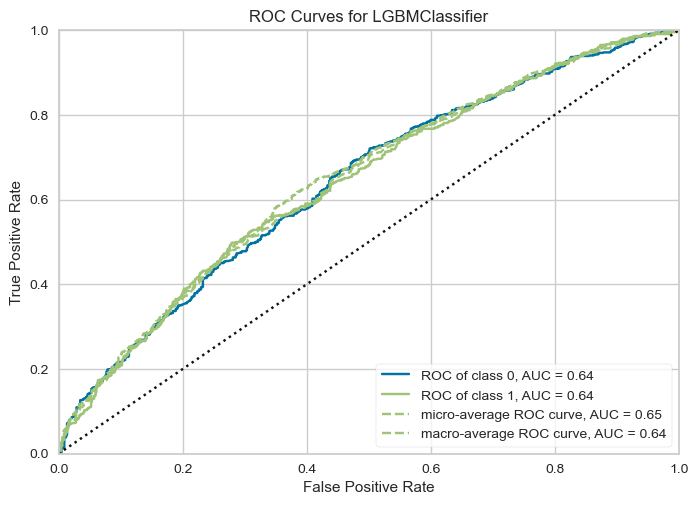

In [8]:
plot_model(best, plot = 'auc')

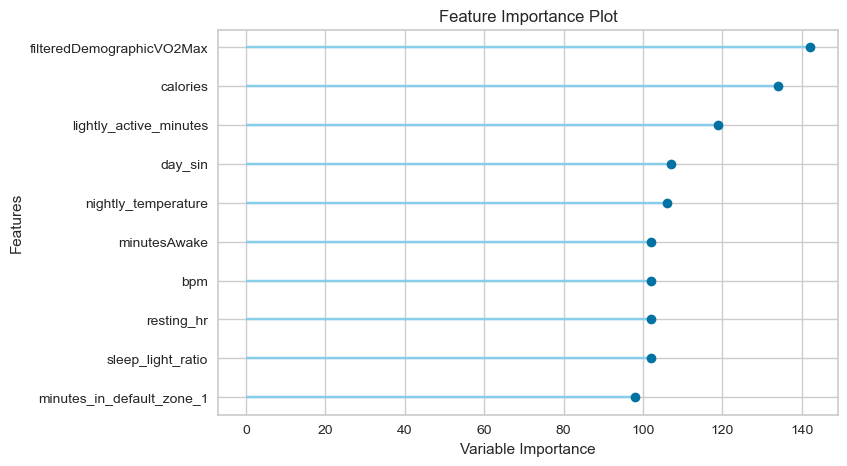

In [9]:
plot_model(best, plot='feature')

In [10]:
df = data.drop(columns=['negative_feelings'])

In [11]:
grid = setup(data=df, target='positive_feelings', silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,positive_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4945, 50)"
5,Missing Values,True
6,Numeric Features,41
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6348,0.6706,0.7086,0.6581,0.6818,0.2543,0.2561,0.0630
et,Extra Trees Classifier,0.6319,0.6458,0.6538,0.6722,0.6619,0.2579,0.2590,0.1150
gbc,Gradient Boosting Classifier,0.6235,0.6645,0.7405,0.6380,0.6849,0.2234,0.2280,0.3380
rf,Random Forest Classifier,0.6198,0.6555,0.6909,0.6467,0.6675,0.2244,0.2257,0.1240
ada,Ada Boost Classifier,0.6131,0.6383,0.7165,0.6330,0.6715,0.2050,0.2083,0.0940
dt,Decision Tree Classifier,0.6117,0.6263,0.5963,0.6669,0.6291,0.2242,0.2261,0.0260
ridge,Ridge Classifier,0.6010,0.0000,0.7254,0.6189,0.6675,0.1761,0.1804,0.0180
lda,Linear Discriminant Analysis,0.6010,0.6232,0.7238,0.6191,0.6670,0.1764,0.1806,0.0360
nb,Naive Bayes,0.5660,0.5622,0.7582,0.5834,0.6587,0.0891,0.0953,0.0160
knn,K Neighbors Classifier,0.5571,0.5682,0.6308,0.5933,0.6111,0.0975,0.0980,0.0370


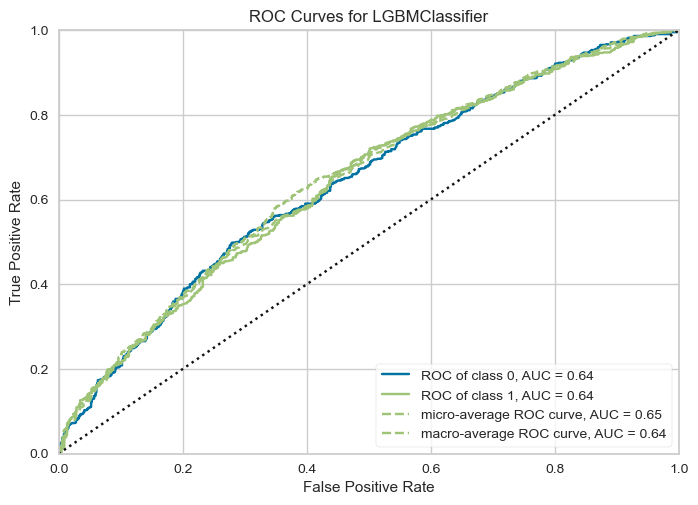

In [13]:
plot_model(best, plot = 'auc')

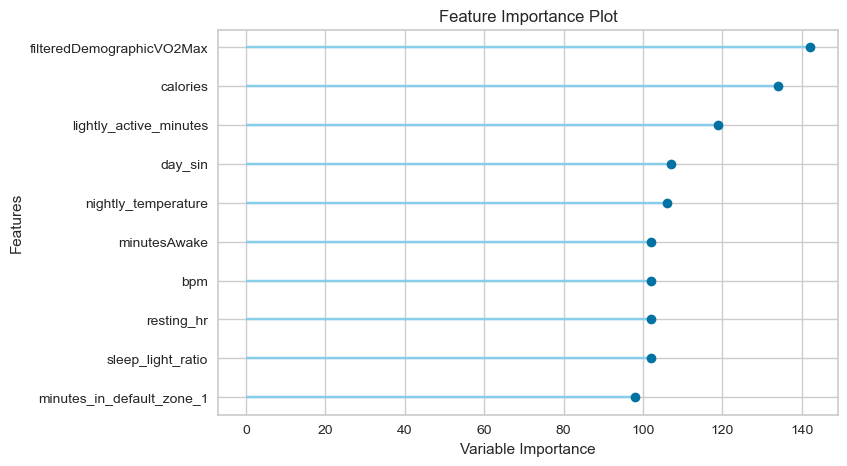

In [14]:
plot_model(best, plot = 'feature')

# First Step
check setup in: https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform

In [15]:
data=pd.read_pickle('data/fitbit_sema_outliers_nans_replaced.pkl')
df = data.drop(columns=['positive_feelings'])
grid = setup(data=df, target='negative_feelings',  fix_imbalance=True, transformation = True, silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4945, 67)"
5,Missing Values,False
6,Numeric Features,63
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6310,0.6712,0.5712,0.5910,0.5792,0.2512,0.2525,0.0980
et,Extra Trees Classifier,0.6215,0.6419,0.5117,0.5878,0.5458,0.2245,0.2266,0.1290
rf,Random Forest Classifier,0.6206,0.6540,0.5692,0.5780,0.5725,0.2318,0.2325,0.1630
dt,Decision Tree Classifier,0.6105,0.6225,0.4942,0.5748,0.5306,0.2013,0.2033,0.0650
gbc,Gradient Boosting Classifier,0.6094,0.6588,0.5712,0.5614,0.5653,0.2109,0.2115,0.3270
knn,K Neighbors Classifier,0.6016,0.6275,0.6372,0.5465,0.5881,0.2067,0.2093,0.1000
ada,Ada Boost Classifier,0.5972,0.6364,0.5789,0.5472,0.5619,0.1899,0.1907,0.1110
lda,Linear Discriminant Analysis,0.5935,0.6204,0.5570,0.5452,0.5503,0.1797,0.1801,0.0440
ridge,Ridge Classifier,0.5923,0.0000,0.5583,0.5438,0.5503,0.1778,0.1781,0.0450
lr,Logistic Regression,0.5880,0.6198,0.5589,0.5385,0.5480,0.1699,0.1703,0.0570


In [17]:
# create a model
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6254,0.6713,0.6452,0.5714,0.6061,0.2514,0.2531
1,0.6561,0.7042,0.6039,0.6159,0.6098,0.3024,0.3024
2,0.6272,0.6655,0.5974,0.5786,0.5879,0.2476,0.2478
3,0.6792,0.7139,0.6364,0.6405,0.6384,0.3501,0.3501
4,0.6040,0.6508,0.4935,0.5630,0.5260,0.1885,0.1897
5,0.5838,0.6103,0.4710,0.5407,0.5034,0.1482,0.1492
6,0.6243,0.6597,0.6065,0.5767,0.5912,0.2440,0.2443
7,0.6185,0.6557,0.5355,0.5804,0.5570,0.2230,0.2235
8,0.6272,0.6598,0.6129,0.5793,0.5956,0.2503,0.2506


In [18]:
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


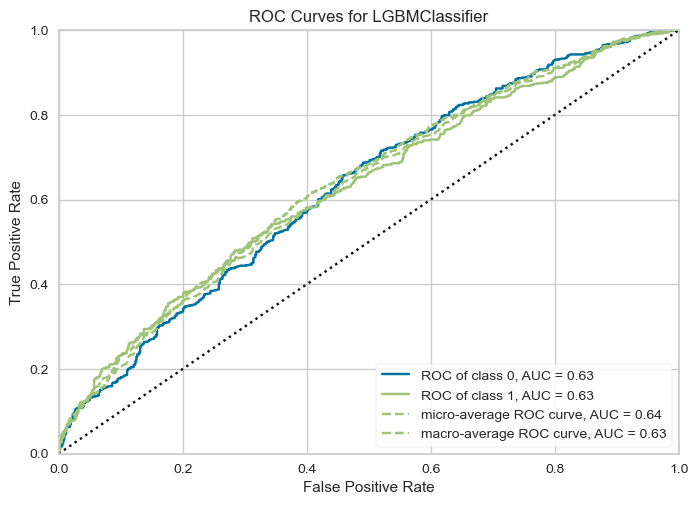

In [19]:
plot_model(model, plot = 'auc')

In [20]:
# tune a model
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6282,0.6690,0.6194,0.5783,0.5981,0.2530,0.2536
1,0.6590,0.7029,0.6169,0.6169,0.6169,0.3096,0.3096
2,0.6474,0.6906,0.6234,0.6000,0.6115,0.2889,0.2891
3,0.6590,0.7090,0.6429,0.6111,0.6266,0.3131,0.3135
4,0.6127,0.6580,0.5325,0.5694,0.5503,0.2109,0.2113
5,0.6214,0.6302,0.5484,0.5822,0.5648,0.2303,0.2306
6,0.6243,0.6433,0.6065,0.5767,0.5912,0.2440,0.2443
7,0.6098,0.6689,0.4968,0.5746,0.5329,0.2009,0.2025
8,0.6243,0.6731,0.5935,0.5786,0.5860,0.2422,0.2422


In [21]:
print(tuned_model)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


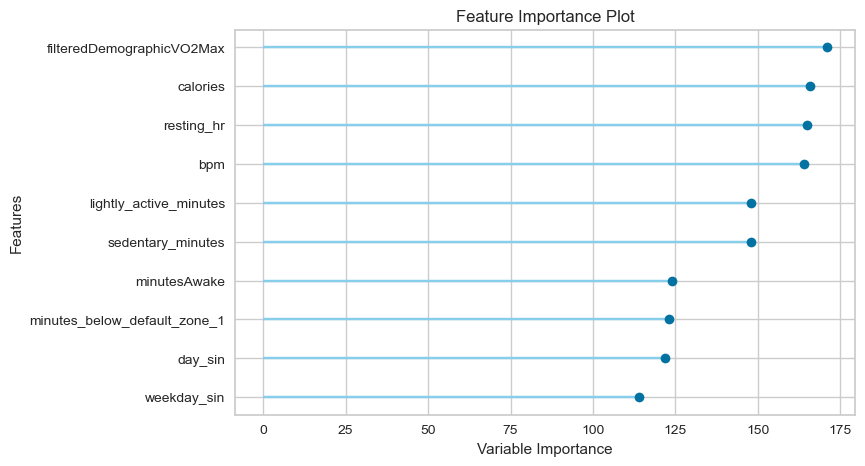

In [22]:
plot_model(tuned_model, plot='feature')

In [23]:
# predict on test set
predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6038,0.6423,0.5302,0.5589,0.5442,0.1942,0.1944
